In [ ]:
import pandas as pd

data_path = r"D:\NEU\TrucQuanHoaDL\BTNhom\Netflix Engagement Dataset.xlsx"

df = pd.read_excel(data_path)

df.shape, df.head(3)


((3500, 16),
    Customer ID  Subscription Length (Months)  \
 0            1                            50   
 1            2                            40   
 2            3                            17   
 
    Customer Satisfaction Score (1-10)  Daily Watch Time (Hours)  \
 0                                  10                      4.32   
 1                                   5                      4.45   
 2                                   8                      4.81   
 
    Engagement Rate (1-10) Device Used Most Often Genre Preference  \
 0                       8                 Mobile          Romance   
 1                       3               Smart TV           Comedy   
 2                       8                 Laptop           Sci-fi   
 
           Region Payment History (On-Time/Delayed) Subscription Plan  \
 0        Oceania                           On-Time           Premium   
 1           Asia                           On-Time           Premium   
 2  South Amer

>> MISSING VALUE & DATA TYPE SUMMARY:
                                Column  Missing Count  Missing % Data Type
0                          Customer ID              0        0.0     int64
1         Subscription Length (Months)              0        0.0     int64
2   Customer Satisfaction Score (1-10)              0        0.0     int64
3             Daily Watch Time (Hours)              0        0.0   float64
4               Engagement Rate (1-10)              0        0.0     int64
5               Device Used Most Often              0        0.0    object
6                     Genre Preference              0        0.0    object
7                               Region              0        0.0    object
8    Payment History (On-Time/Delayed)              0        0.0    object
9                    Subscription Plan              0        0.0    object
10               Churn Status (Yes/No)              0        0.0    object
11              Support Queries Logged              0        0

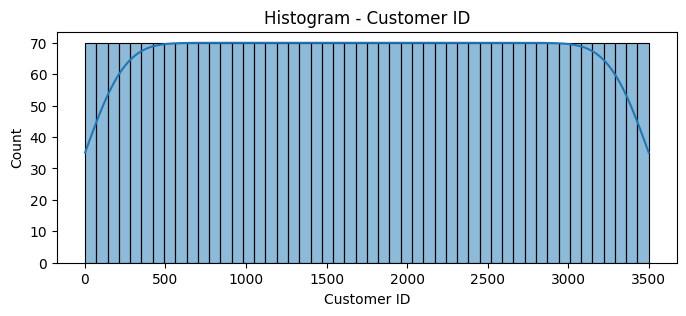

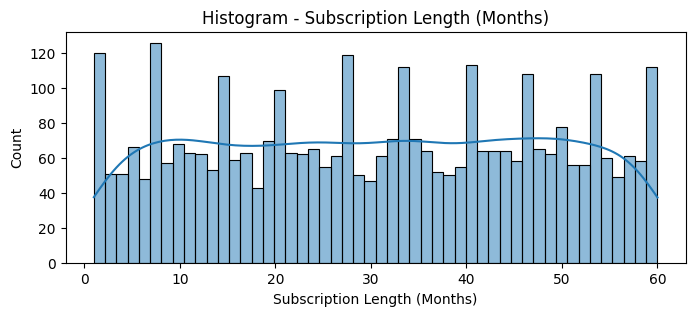

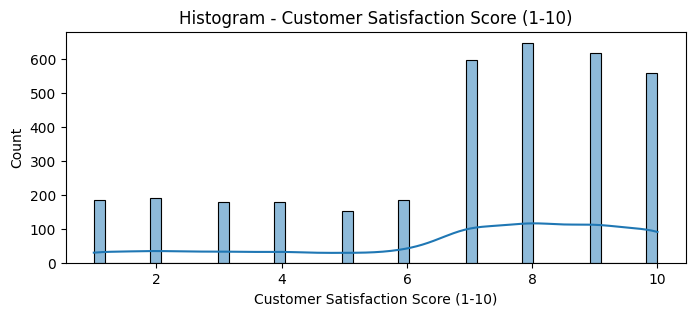

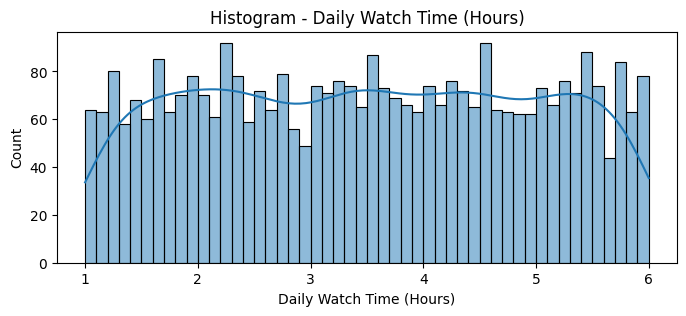

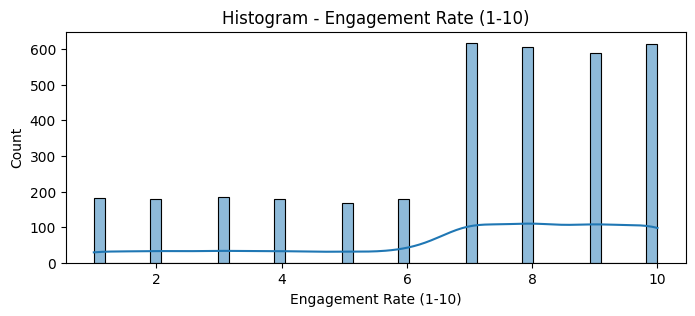

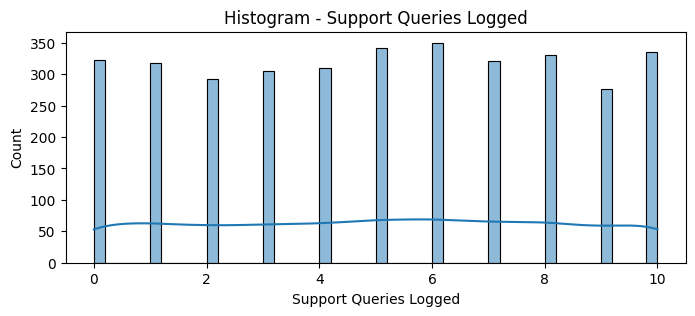

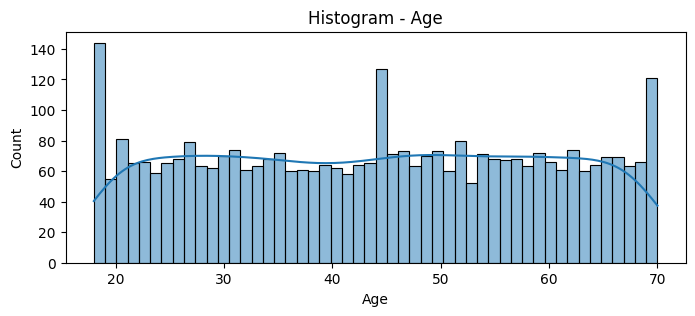

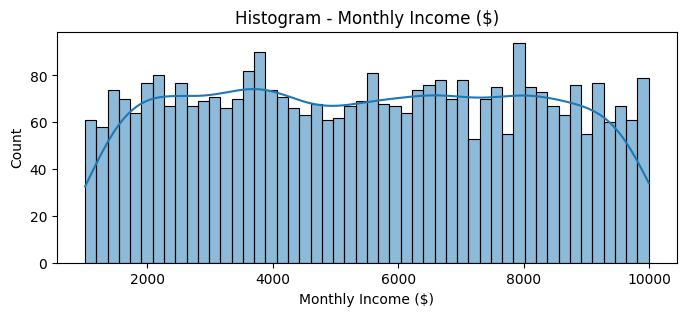

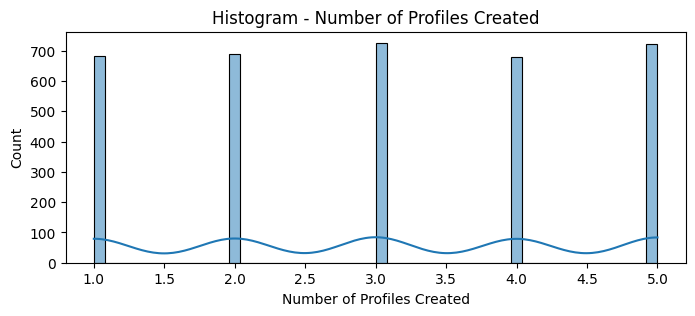

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Kiểm tra missing values và kiểu dữ liệu
def check_missing_and_types(df):
    missing_summary = df.isnull().sum().reset_index()
    missing_summary.columns = ['Column', 'Missing Count']
    missing_summary['Missing %'] = (missing_summary['Missing Count'] / len(df)) * 100
    dtypes_summary = df.dtypes.reset_index()
    dtypes_summary.columns = ['Column', 'Data Type']
    return pd.merge(missing_summary, dtypes_summary, on='Column')

# Thống kê mô tả dữ liệu số 
def check_numerical_outliers(df, cols):
    stats = df[cols].describe().T
    stats["missing"] = df[cols].isnull().sum()
    stats["dtype"] = df[cols].dtypes
    return stats

# Vẽ biểu đồ phân phối các cột số 
def plot_histograms(df, cols):
    for col in cols:
        plt.figure(figsize=(8, 3))
        sns.histplot(df[col], bins=50, kde=True)
        plt.title(f'Histogram - {col}')
        plt.show()


numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Kiểm tra missing + kiểu dữ liệu
summary_missing_types = check_missing_and_types(df)
print(">> MISSING VALUE & DATA TYPE SUMMARY:")
print(summary_missing_types)

# Thống kê mô tả dữ liệu số
summary_outliers = check_numerical_outliers(df, numeric_cols)
print("\n>> NUMERICAL SUMMARY:")
print(summary_outliers)

# Vẽ biểu đồ histogram
plot_histograms(df, numeric_cols)
